# Texas Licenses

I originally got this dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd
from pprintpp import pprint as pp
import numpy as np 

/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv("licfile.csv")
df.head()

/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
columns = ['license_type', 
           'license_number', 
           'county', 
           'business_name', 
           'business_line1', 
           'business_line2', 
           'business_city_state',
           'business_telephone',
           'expiration', 
           'owner',
           'mail_line1',
           'mail_line2',
           'mail_city_state',
           'mail_county_code',
           'mail_county',
           'mail_zip',
           'phone',
           'license_subtype',
           'cont_ed_flag'
          ]

df = pd.read_csv("licfile.csv", names = columns)
df.tail(100)

/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,license_type,license_number,county,business_name,business_line1,business_line2,business_city_state,business_telephone,expiration,owner,mail_line1,mail_line2,mail_city_state,mail_county_code,mail_county,mail_zip,phone,license_subtype,cont_ed_flag
597716,Water Well Driller/Pump Installer,59628,MONTGOMERY,"SIMONELLI, RODNEY JAMES",NaN,NaN,NaN,NaN,1112018,"SIMONELLI, RODNEY JAMES",PO BOX 970,NaN,WILLIS TX 77378-0970,339.0,MONTGOMERY,77378,9.36857e+09,P,N
597717,Water Well Driller/Pump Installer,59630,LUBBOCK,"RUDDER, LEVI DALE",NaN,NaN,NaN,NaN,2232018,"RUDDER, LEVI DALE",6632 76TH ST,NaN,LUBBOCK TX 79424-0922,303.0,LUBBOCK,79424,8.06744e+09,PW,N
597718,Water Well Driller/Pump Installer,59631,NACOGDOCHES,"SMITH, DONNY L",NaN,NaN,NaN,NaN,1152018,"SMITH, DONNY L",1120 NW STALLINGS DR,NaN,NACOGDOCHES TX 75964-3428,347.0,NACOGDOCHES,75964,9.36569e+09,M,N
597719,Water Well Driller/Pump Installer,59632,LIBERTY,"JOHNSON, BRIAN K",NaN,NaN,NaN,NaN,1182018,"JOHNSON, BRIAN K",2338 GREENGLADE LN,NaN,SPRING TX 77386-2106,339.0,MONTGOMERY,77386,8.32515e+09,M,N
597720,Water Well Driller/Pump Installer,59634,HAYS,"EZELL, AVERY C",NaN,NaN,NaN,NaN,2142018,"EZELL, AVERY C",3810 HUNTER RD,NaN,SAN MARCOS TX 78666-9392,209.0,HAYS,78666,5.12353e+09,KLP,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597811,Water Well Driller/Pump Installer,59930,TOM GREEN,"ABEL, JUSTIN C",NaN,NaN,NaN,NaN,1232018,"ABEL, JUSTIN C",6601 RM HIGHWAY 853,NaN,SAN ANGELO TX 76901-9716,451.0,TOM GREEN,76901,3.2595e+09,KP,N
597812,Water Well Driller/Pump Installer,59931,RUNNELS,"GRAY, MATTHEW BRYAN",NaN,NaN,NaN,NaN,1232018,"GRAY, MATTHEW BRYAN",401 VICTOR ST,NaN,ROWENA TX 76875-2608,399.0,RUNNELS,76875,3.25442e+09,KLPW,N
597813,Water Well Driller/Pump Installer,59934,LAVACA,"MAYER, DAVID W",NaN,NaN,NaN,NaN,1272018,"MAYER, DAVID W",966 FM 318 E,NaN,YOAKUM TX 77995-6786,285.0,LAVACA,77995,3.61293e+09,P,N
597814,Water Well Driller/Pump Installer,59936,HOCKLEY,"FRIESEN, FRANCISCO FEHR",NaN,NaN,NaN,NaN,2132018,"FRIESEN, FRANCISCO FEHR",3686 JAMAICA RD,NaN,LEVELLAND TX 79336-9124,219.0,HOCKLEY,79336,8.06598e+09,W,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [4]:
df = pd.read_csv("licfile.csv", names = columns, dtype={"expiration": str, "license_number": str, "mail_county_code": str, "mail_zip": str, "phone": str})

df.head()

,license_type,license_number,county,business_name,business_line1,business_line2,business_city_state,business_telephone,expiration,owner,mail_line1,mail_line2,mail_city_state,mail_county_code,mail_county,mail_zip,phone,license_subtype,cont_ed_flag
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,02252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [5]:
df.dtypes

license_type            object
license_number          object
county                  object
business_name           object
business_line1         float64
business_line2         float64
business_city_state    float64
business_telephone     float64
expiration              object
owner                   object
mail_line1              object
mail_line2              object
mail_city_state         object
mail_county_code        object
mail_county             object
mail_zip                object
phone                   object
license_subtype         object
cont_ed_flag            object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

You can use list slicing with `.str` (we did `dt.per_name.str[:4]` for the home data stuff once), `pd.to_datetime`, or a hundred other methods.

In [6]:
df.expiration[0][:4]

for i in df.expiration.head(5):
    df['year'] = i[4:]
    df['month'] = i[0:2]
    df['day'] = i[2:4]

df['expiration'] = df['year'] + "-" + df['month'] + "-" + df['day']

df.drop(['year', 'month', 'day'], axis=1)

,license_type,license_number,county,business_name,business_line1,business_line2,business_city_state,business_telephone,expiration,owner,mail_line1,mail_line2,mail_city_state,mail_county_code,mail_county,mail_zip,phone,license_subtype,cont_ed_flag
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2018-02-25,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2018-02-25,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2018-02-25,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2018-02-25,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597811,Water Well Driller/Pump Installer,59930,TOM GREEN,"ABEL, JUSTIN C",NaN,NaN,NaN,NaN,2018-02-25,"ABEL, JUSTIN C",6601 RM HIGHWAY 853,NaN,SAN ANGELO TX 76901-9716,0451,TOM GREEN,76901,3259496607,KP,N
597812,Water Well Driller/Pump Installer,59931,RUNNELS,"GRAY, MATTHEW BRYAN",NaN,NaN,NaN,NaN,2018-02-25,"GRAY, MATTHEW BRYAN",401 VICTOR ST,NaN,ROWENA TX 76875-2608,0399,RUNNELS,76875,3254422331,KLPW,N
597813,Water Well Driller/Pump Installer,59934,LAVACA,"MAYER, DAVID W",NaN,NaN,NaN,NaN,2018-02-25,"MAYER, DAVID W",966 FM 318 E,NaN,YOAKUM TX 77995-6786,0285,LAVACA,77995,3612933168,P,N
597814,Water Well Driller/Pump Installer,59936,HOCKLEY,"FRIESEN, FRANCISCO FEHR",NaN,NaN,NaN,NaN,2018-02-25,"FRIESEN, FRANCISCO FEHR",3686 JAMAICA RD,NaN,LEVELLAND TX 79336-9124,0219,HOCKLEY,79336,8065980508,W,N


Check the first five expirations to make sure they look right.

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [7]:
df.value_counts('license_type').head(10)

license_type
Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
dtype: int64

## 6. What are the top 10 least common?

In [8]:
df.value_counts('license_type').tail(10)

license_type
Elevator Responsible Party CE Provider             8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Braiding Shop                          4
Barber Hair Weaving Shop                           4
Booting CE Provider                                3
Mobile Cosmetology Esthetician/Manicure Saloon     2
Mobile Cosmetology Manicure Specialty Saloon       2
Licensed Court Interpreter CE Provider             2
Cosmetology Wig Instructor                         2
Legal Service Contract Admin                       1
dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [9]:
# Yes I know I left this in here, it's a learning experience!
#df[df['license_type']].str.contains("Electrician")

## 8. How many of the rows of LICTYPE are NaN?

In [10]:
df['license_type'].str.contains("Electrician").value_counts(dropna=False)
#7086 NaNs

False    418892
True     171838
NaN        7086
Name: license_type, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [11]:
df[df.license_type.str.contains("Electrician").fillna(False)]

,license_type,license_number,county,business_name,business_line1,business_line2,business_city_state,business_telephone,expiration,owner,...,mail_city_state,mail_county_code,mail_county,mail_zip,phone,license_subtype,cont_ed_flag,year,month,day
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2018-02-25,"BOLTON, MARION N",...,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N,2018,02,25
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2018-02-25,"GONZALEZ, FELIX G JR",...,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N,2018,02,25
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2018-02-25,"HERNANDEZ, RUFINO",...,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N,2018,02,25
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2018-02-25,"COPELAND, MARCUS A",...,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N,2018,02,25
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2018-02-25,"ANGLIN, DAVID LEE",...,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N,2018,02,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569544,Apprentice Sign Electrician,393609,PARKER,"ORTEGA, JUAN",NaN,NaN,NaN,NaN,2018-02-25,"ORTEGA, JUAN",...,HUDSON OAKS TX 76087-8337,0367,PARKER,76087,8173746117,SA,N,2018,02,25
569545,Apprentice Sign Electrician,393610,OUT OF STATE,"BARR, SYLVIA M",NaN,NaN,NaN,NaN,2018-02-25,"BARR, SYLVIA M",...,FAIRMONT WV 26554-8309,0999,OUT OF STATE,26554,3047779007,SA,N,2018,02,25
569546,Apprentice Sign Electrician,393611,OUT OF STATE,"MALFAVON, SALVADOR H",NaN,NaN,NaN,NaN,2018-02-25,"MALFAVON, SALVADOR H",...,KINGSPORT TN 37660-4945,0999,OUT OF STATE,37660,4237656317,SA,N,2018,02,25
569547,Apprentice Sign Electrician,393612,WICHITA,"ARANDA, JOSE A SR",NaN,NaN,NaN,NaN,2018-02-25,"ARANDA, JOSE A SR",...,WICHITA FALLS TX 76301-7837,0485,WICHITA,76301,9408674318,SA,N,2018,02,25


This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [12]:
#used this above

## 10. What's the most popular kind of electrician?

In [13]:
electricians = df[df.license_type.str.contains("Electrician").fillna(False)]

electricians.license_type.mode()

0    Apprentice Electrician
dtype: object

## 11. Graph it, with the largest bar on top.

<AxesSubplot:>

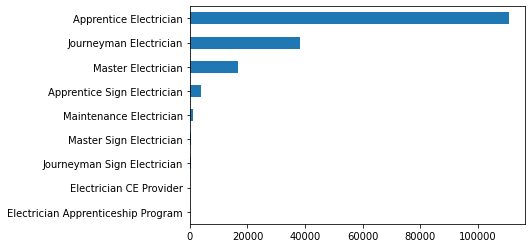

In [14]:
electricians.license_type.value_counts().sort_values(ascending=True).plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [15]:
sign_electricians = df[df.license_type.str.contains("Sign Electrician").fillna(False)]
#sign_electricians
sign_electrician_number = len(sign_electricians)

print(f'There are {sign_electrician_number:,} sign electricians.')

There are 4,927 sign electricians.


# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [16]:
df.owner.fillna('').str.extract("^(\w+),", expand=False)

0         RISINGER
1         WILLIAMS
2          GUEVARA
3           BOWERS
4           DEMSKY
            ...   
597811        ABEL
597812        GRAY
597813       MAYER
597814     FRIESEN
597815       BAUER
Name: owner, Length: 597816, dtype: object

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [17]:
df['lastname'] = df.owner.fillna('').str.extract("^(\w+\W?.{0,10}?),", expand=False)

In [18]:
df

,license_type,license_number,county,business_name,business_line1,business_line2,business_city_state,business_telephone,expiration,owner,...,mail_county_code,mail_county,mail_zip,phone,license_subtype,cont_ed_flag,year,month,day,lastname
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2018-02-25,"RISINGER, JIM MARVIN",...,0347,NACOGDOCHES,75964,9363665745,NaN,N,2018,02,25,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2018-02-25,"WILLIAMS, JON ANDRE",...,0183,GREGG,75662,9039187899,NaN,N,2018,02,25,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2018-02-25,"GUEVARA, JUAN ANTONIO",...,0493,WILSON,78147,NaN,NaN,N,2018,02,25,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2018-02-25,"BOWERS, JAMES BRISCOE II",...,0201,HARRIS,77076,7136445566,NaN,N,2018,02,25,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,0027,BELL,76511,2549852228,NaN,N,2018,02,25,DEMSKY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597811,Water Well Driller/Pump Installer,59930,TOM GREEN,"ABEL, JUSTIN C",NaN,NaN,NaN,NaN,2018-02-25,"ABEL, JUSTIN C",...,0451,TOM GREEN,76901,3259496607,KP,N,2018,02,25,ABEL
597812,Water Well Driller/Pump Installer,59931,RUNNELS,"GRAY, MATTHEW BRYAN",NaN,NaN,NaN,NaN,2018-02-25,"GRAY, MATTHEW BRYAN",...,0399,RUNNELS,76875,3254422331,KLPW,N,2018,02,25,GRAY
597813,Water Well Driller/Pump Installer,59934,LAVACA,"MAYER, DAVID W",NaN,NaN,NaN,NaN,2018-02-25,"MAYER, DAVID W",...,0285,LAVACA,77995,3612933168,P,N,2018,02,25,MAYER
597814,Water Well Driller/Pump Installer,59936,HOCKLEY,"FRIESEN, FRANCISCO FEHR",NaN,NaN,NaN,NaN,2018-02-25,"FRIESEN, FRANCISCO FEHR",...,0219,HOCKLEY,79336,8065980508,W,N,2018,02,25,FRIESEN


# 15. What are the ten most popular last names?

In [19]:
df['lastname'].value_counts().head(10)

NGUYEN       22283
TRAN          8136
LE            5605
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4625
HERNANDEZ     4389
PHAM          3996
GONZALEZ      3634
SMITH         3208
Name: lastname, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [20]:
df[(df.lastname == "NGUYEN") | (df.lastname == "TRAN") | (df.lastname == "LE")].license_type.value_counts()


Cosmetology Manicurist                      20806
Cosmetology Operator                         6466
Cosmetology Esthetician                      4643
Cosmetologist                                3083
Apprentice Electrician                        327
A/C Technician                                281
Journeyman Electrician                         91
Cosmetology Operator Instructor                70
Barber Manicurist                              37
Barber, Class A                                36
Master Electrician                             36
Property Tax Appraiser                         21
Apprentice Sign Electrician                    20
Cosmetology Manicurist Instructor              12
Used Auto Parts Recycler Employee              10
Legal Service Contract Sales Rep               10
Maintenance Electrician                         8
Tow Truck Operator (Consent Tow)                7
Tow Truck Operator (Incident Management)        7
Master Sign Electrician                         6


In [21]:
print("The most popular licenses for people with these last names are cosmetology-related.")

The most popular licenses for people with these last names are cosmetology-related.


The background of this [is interesting](https://www.npr.org/2019/05/19/724452398/how-vietnamese-americans-took-over-the-nails-business-a-documentary) and [tragic](https://www.nytimes.com/2015/05/10/nyregion/at-nail-salons-in-nyc-manicurists-are-underpaid-and-unprotected.html).

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [22]:
#I might have done this the first time
df[(df.lastname == "NGUYEN") | (df.lastname == "TRAN") | (df.lastname == "LE")].license_type.value_counts()



Cosmetology Manicurist                      20806
Cosmetology Operator                         6466
Cosmetology Esthetician                      4643
Cosmetologist                                3083
Apprentice Electrician                        327
A/C Technician                                281
Journeyman Electrician                         91
Cosmetology Operator Instructor                70
Barber Manicurist                              37
Barber, Class A                                36
Master Electrician                             36
Property Tax Appraiser                         21
Apprentice Sign Electrician                    20
Cosmetology Manicurist Instructor              12
Used Auto Parts Recycler Employee              10
Legal Service Contract Sales Rep               10
Maintenance Electrician                         8
Tow Truck Operator (Consent Tow)                7
Tow Truck Operator (Incident Management)        7
Master Sign Electrician                         6


## 19. Most popular license for anyone with a last name that ENDS in `-ko`

The answer is not `.str.contains('ko')`, but it isn't necessarily too different.

* One way involves a `.str.` method that check if a string ends with something,
* the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before)

If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [23]:
df[df.lastname.str.contains("KO$").fillna(False)].license_type.mode()

0    Cosmetology Operator
dtype: object

.#### 20. Get that as a percentage

In [24]:
df[df.lastname.str.contains("KO$").fillna(False)].license_type.value_counts(normalize=True).head(1) * 100

Cosmetology Operator    37.640449
Name: license_type, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [25]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [26]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [27]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [28]:
df['owner'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: owner, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [29]:
df.owner.str.extract("^\w+, (\w+)").head(10)

,0
0,JIM
1,JON
2,JUAN
3,JAMES
4,JOHN
5,RANDY
6,MONTE
7,THOMAS
8,KERRY
9,NICHOLAS


## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [30]:
df['firstname'] = df.owner.str.extract("^\w+, (\w+)")
#df

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [31]:
df.firstname.value_counts(dropna=False)


print("105,055 people... yikes.")


105,055 people... yikes.


What do their names look like?

In [32]:
# They're NaN values with some sort of space or character in the name.
# I found a lot of names like De ___, O'____, St ____, La ____, etc as nulls in the last names through this too.
# I changed my original last name regex to include them.
#df[df.firstname.isna()]

#So I reset it:
#df['firstname'] = df.owner.str.extract("^\w+\W?.{0,30}?, (\w+)")

#But then anything with strange spacing on the commas in the "owner" column or with a company name as the owner name did not fit.
#for instance names like "Lowery,Mark" or "Lastname ,Firstname"
#So I added a space before and after the comma with a ? after to get these people

df['firstname'] = df.owner.str.extract("^\w+\W?.{0,30}? ?, ?(\w+)")

#Now it's just companies with a business name in the owner column

df[df.firstname.isna()]



,license_type,license_number,county,business_name,business_line1,business_line2,business_city_state,business_telephone,expiration,owner,...,mail_county,mail_zip,phone,license_subtype,cont_ed_flag,year,month,day,lastname,firstname
28022,Appliance Installation Contractor,101,HARRIS,APPLIANCE INSTALLATION BY SPECIAL D LLC,NaN,NaN,NaN,NaN,2018-02-25,APPLIANCE INSTALLATION BY SPECIAL D LLC,...,HARRIS,77093,2815363711,RAIC,N,2018,02,25,NaN,NaN
28023,Appliance Installation Contractor,103,DALLAS,CAPITAL DISTRIBUTING INC,NaN,NaN,NaN,NaN,2018-02-25,CAPITAL DISTRIBUTING INC,...,DALLAS,75247,2146382681,RAIC,N,2018,02,25,NaN,NaN
28024,Appliance Installation Contractor,104,DALLAS,INSTALLCO LLC,NaN,NaN,NaN,NaN,2018-02-25,INSTALLCO LLC,...,DALLAS,75247,2142761033,RAIC,N,2018,02,25,NaN,NaN
28025,Appliance Installation Contractor,107,BOWIE,LAFFERTYS TV & APPLIANCE INC,NaN,NaN,NaN,NaN,2018-02-25,LAFFERTYS TV & APPLIANCE INC,...,BOWIE,75503,9037942581,RAIC,N,2018,02,25,NaN,NaN
28026,Appliance Installation Contractor,108,FREESTONE,BALLARD COMPANY,NaN,NaN,NaN,NaN,2018-02-25,BALLARD COMPANY,...,FREESTONE,75840,9033895774,RAIC,N,2018,02,25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590395,Used Auto Parts Recycler,1513,BEXAR,R & D PARTS INC.,NaN,NaN,NaN,NaN,2018-02-25,R & D PARTS INC.,...,BEXAR,78211,2106232000,RECYCLER,N,2018,02,25,NaN,NaN
590397,Used Auto Parts Recycler,1514,DALLAS,DFW AUTO & PARTS SALES,NaN,NaN,NaN,NaN,2018-02-25,DFW AUTO & PARTS SALES,...,TARRANT,76117,8174399281,RECYCLER,N,2018,02,25,NaN,NaN
590399,Used Auto Parts Recycler,1515,HARRIS,T&D BRADLEY AUTO SERVICE LLC,NaN,NaN,NaN,NaN,2018-02-25,T&D BRADLEY AUTO SERVICE LLC,...,HARRIS,77022,8322096210,RECYCLER,N,2018,02,25,NaN,NaN
590400,Used Auto Parts Recycler,1516,DALLAS,A & M AUTO PARTS,NaN,NaN,NaN,NaN,2018-02-25,A & M AUTO PARTS,...,DALLAS,75216,2143711500,RECYCLER,N,2018,02,25,NaN,NaN


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [33]:
df.loc[df.firstname.isnull(), 'firstname'] = "unknown"

#Testing with one of the nas from above
#df[df.owner == "BALLARD COMPANY"]

How many empty first names do we have now?

In [34]:
print(len(df[df.firstname == "unknown"]), "empty names. :(")



81627 empty names. :(


My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [35]:
df.firstname = df.firstname.replace({"unknown": np.nan})

print("---Top 10 First Names, Percentage of Total First Names---")
df.firstname.value_counts(normalize=True).head(10)*100




---Top 10 First Names, Percentage of Total First Names---


JOSE           1.503713
MICHAEL        1.140086
DAVID          1.042060
MARIA          1.023269
JAMES          0.958176
JUAN           0.885141
ROBERT         0.850270
JOHN           0.845427
CHRISTOPHER    0.607917
DANIEL         0.589319
Name: firstname, dtype: float64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` or `na=False` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [36]:
print("---Top 10 Cosmetological License Holder Names (%)---")
df[df.license_type.str.contains("Cosm").fillna(False)].firstname.value_counts(normalize=True).head(10)*100

---Top 10 Cosmetological License Holder Names (%)---


MARIA       1.992378
THUY        0.900389
PHUONG      0.845707
JENNIFER    0.794363
KIM         0.764726
JESSICA     0.682075
THANH       0.628645
MARY        0.578553
ASHLEY      0.567283
THU         0.548916
Name: firstname, dtype: float64

## 27. Most popular first names for anything involving electricity?

In [37]:
print("---Top 10 Electrical License Holder Names (%)---")
df[df.license_type.str.contains("Electric").fillna(False)].firstname.value_counts(normalize=True).head(10)*100

---Top 10 Electrical License Holder Names (%)---


JOSE           3.313099
MICHAEL        2.054469
JUAN           1.931676
DAVID          1.920092
JAMES          1.721422
JOHN           1.472360
ROBERT         1.464251
DANIEL         1.162481
CHRISTOPHER    1.142208
WILLIAM        1.010727
Name: firstname, dtype: float64

## 28. Can we be any more obnoxious in this assignment?

A terrible thing that data analysts are often guilty of is using names to make assumptions about people. Beyond stereotypes involving last names, first names are often used to predict someone's race, ethnic background, or gender.

And if that isn't bad enough: if we were looking for Python libraries to do this sort of analysis, we'd come across [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again.

How'd it happen? [On Github, in a pull request!](https://github.com/bmuller/gender_detector/pull/14) Neat, right?

But yeah: apparently Python didn't get the message.

The sexmachine package doesn't work on Python 3 because it's from 300 BC, so we're going to use a Python 3 fork with the less problematic name [gender guesser](https://pypi.python.org/pypi/gender-guesser/).

#### Use `pip` or `pip3` to install gender-guesser.

In [38]:
!pip install gender-guesser

You should consider upgrading via the 'pip install --upgrade pip' command.


#### Run this code to test to see that it works

In [39]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [40]:
detector.get_gender('Jose')

'male'

In [41]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [42]:
df['firstname'].fillna('').apply(lambda name: detector.get_gender(name)).head(20)

0              male
1              male
2              male
3              male
4              male
5       mostly_male
6              male
7              male
8     mostly_female
9              male
10             male
11             male
12      mostly_male
13             male
14             male
15             male
16          unknown
17             male
18             male
19             andy
Name: firstname, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [43]:
df['gender_guess'] = df['firstname'].fillna('').apply(lambda name: detector.get_gender(name))

In [44]:
df.gender_guess.value_counts()

male             229145
female           148305
unknown          130349
mostly_female     42368
mostly_male       26618
andy              21031
Name: gender_guess, dtype: int64

## 30. We like our data to be in tidy binary categories

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [45]:
import numpy as np

df.gender_guess = df.gender_guess.replace({
    'mostly_male': 'male',
    'mostly_female': 'female',
    'andy': np.nan,
    'unknown': np.nan
})

df.gender_guess.value_counts(dropna=False)

male      255763
female    190673
NaN       151380
Name: gender_guess, dtype: int64

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [46]:
male_number = len(df[df.gender_guess == "male"])
female_number = len(df[df.gender_guess == "feale"])

if male_number > female_number:
    print("There are more men with licenses than women.")
elif male_number < female_number:
    print("There are more women with licenses than men")
else:
    print("There are the same amount of men and women with licenses.")

There are more men with licenses than women.


In [47]:
df.gender_guess.value_counts(dropna=False, normalize=True)*100

#25.3% of genders in the set are unknown.

male      42.782896
female    31.894931
NaN       25.322173
Name: gender_guess, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [48]:
df[df.gender_guess.isna()].firstname.value_counts().head(20)
#Tranh, Trang, Inc, Hong, Dung, Linh, Lan, LLC, Yen, Hang, Hung, Chau, etc.
#This is mostly cultural bias, but also dirty data (LLC and Inc) and some actual ambiguity

THANH    1555
TRANG    1144
INC      1079
HONG     1027
DUNG      988
LINH      910
LAN       808
LLC       725
YEN       625
HANG      588
HUNG      491
CHAU      482
XUAN      405
HAI       402
CHI       399
TUYEN     399
CASEY     342
DIEM      325
BINH      322
QUYEN     306
Name: firstname, dtype: int64

## 33. Manually check a few, too 

Using [a list of "gender-neutral baby names"](https://www.popsugar.com/family/Gender-Neutral-Baby-Names-34485564), pick a few names and check what results the library gives you.

In [49]:
gender_neutral_names = ["Cameron", "Campbell", "Carey", "Casey", "Cassidy", "Charlie", "Chris", "Dakota", "Dale"]

for name in gender_neutral_names:
    print(name)
    print(detector.get_gender(name))
    print("~*~")

Cameron
mostly_male
~*~
Campbell
male
~*~
Carey
andy
~*~
Casey
andy
~*~
Cassidy
mostly_female
~*~
Charlie
mostly_male
~*~
Chris
mostly_male
~*~
Dakota
mostly_male
~*~
Dale
mostly_male
~*~


## 34. What are the most popular licenses for men? For women?

In [50]:
print("Top Men's License Types")
df[df.gender_guess == "male"].license_type.value_counts().head()

Top Men's License Types


Apprentice Electrician    95682
Journeyman Electrician    35512
A/C Technician            24716
Master Electrician        15770
Cosmetology Operator      13593
Name: license_type, dtype: int64

In [51]:
print("Top Women's License Types")
df[df.gender_guess == "female"].license_type.value_counts().head()

Top Women's License Types


Cosmetology Operator       114921
Cosmetology Manicurist      24792
Cosmetology Esthetician     17150
Apprentice Electrician       4791
Cosmetologist                4614
Name: license_type, dtype: int64

## 35. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values, or `.na=False` with `.str.contains`.

In [52]:
print("Gender Breakdown of Property Tax Appraisers (%)")
df[df.license_type == "Property Tax Appraiser"].gender_guess.value_counts(normalize=True)

Gender Breakdown of Property Tax Appraisers (%)


male      0.552941
female    0.447059
Name: gender_guess, dtype: float64

In [53]:
print("Gender Breakdown of Tow Truckers (%)")
df[df.license_type.str.contains("Tow").fillna(False)].gender_guess.value_counts(normalize=True)

Gender Breakdown of Tow Truckers (%)


male      0.947158
female    0.052842
Name: gender_guess, dtype: float64

(By the way, what are those tow truck jobs?)

In [54]:
df[df.license_type.str.contains("Tow").fillna(False)].license_type

182021                    Tow Operator CE Provider
182022                    Tow Operator CE Provider
182023                    Tow Operator CE Provider
182024                    Tow Operator CE Provider
182025                    Tow Operator CE Provider
                            ...                   
585251    Tow Truck Operator (Incident Management)
585252    Tow Truck Operator (Incident Management)
585253            Tow Truck Operator (Consent Tow)
585254            Tow Truck Operator (Consent Tow)
585255    Tow Truck Operator (Incident Management)
Name: license_type, Length: 19362, dtype: object

## 33. Graph them!

And let's **give them titles** so we know which is which.

Tow Truck Operators by Gender, Percent


<AxesSubplot:>

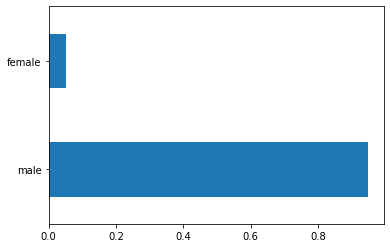

In [55]:
print("   --- Tow Truck Operators by Gender, Percent   ---   ")
df[df.license_type.str.contains("Tow").fillna(False)].gender_guess.value_counts(normalize=True).plot(kind='barh')

Property Tax Appraiser Breakdown by Gender, Percent


<AxesSubplot:>

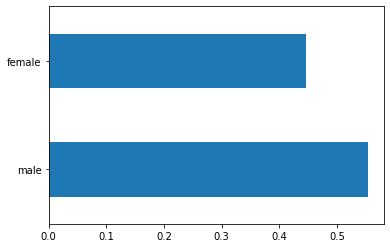

In [56]:
print("   ---   Property Tax Appraiser Breakdown by Gender, Percent   ---   ")
df[df.license_type == "Property Tax Appraiser"].gender_guess.value_counts(normalize=True).plot(kind='barh')

## 34. Calcuate the supposed gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [57]:
# So when you do .value_counts(), it gives you an index and a value
df[df['gender_guess'] == 'male'].license_type.value_counts().head()

Apprentice Electrician    95682
Journeyman Electrician    35512
A/C Technician            24716
Master Electrician        15770
Cosmetology Operator      13593
Name: license_type, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [58]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['gender_guess'] == 'male'].license_type.value_counts(),
    df[df['gender_guess'] == 'female'].license_type.value_counts(),
    df[df['gender_guess'].isnull()].license_type.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

,license_type,license_type,license_type
Apprentice Electrician,95682.0,4791.0,10120.0
Journeyman Electrician,35512.0,1025.0,1633.0
A/C Technician,24716.0,880.0,2363.0
Master Electrician,15770.0,393.0,647.0
Cosmetology Operator,13593.0,114921.0,22692.0


In [59]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,license_type,license_type,license_type
0,Apprentice Electrician,95682.0,4791.0,10120.0
1,Journeyman Electrician,35512.0,1025.0,1633.0
2,A/C Technician,24716.0,880.0,2363.0
3,Master Electrician,15770.0,393.0,647.0
4,Cosmetology Operator,13593.0,114921.0,22692.0


In [60]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,Apprentice Electrician,95682.0,4791.0,10120.0
1,Journeyman Electrician,35512.0,1025.0,1633.0
2,A/C Technician,24716.0,880.0,2363.0
3,Master Electrician,15770.0,393.0,647.0
4,Cosmetology Operator,13593.0,114921.0,22692.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [61]:
gender_df['total_licenses'] = gender_df.male + gender_df.female + gender_df.unknown
gender_df['pct_known'] = (gender_df.male + gender_df.female) / gender_df.total_licenses * 100
gender_df['male_of_known'] = gender_df.male / (gender_df.male + gender_df.female) * 100
gender_df['female_of_known'] = gender_df.female / (gender_df.male + gender_df.female) * 100

gender_df.head()

,license,male,female,unknown,total_licenses,pct_known,male_of_known,female_of_known
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330,95.231555,4.768445
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771,97.194625,2.805375
2,A/C Technician,24716.0,880.0,2363.0,27959.0,91.548339,96.561963,3.438037
3,Master Electrician,15770.0,393.0,647.0,16810.0,96.151101,97.568521,2.431479
4,Cosmetology Operator,13593.0,114921.0,22692.0,151206.0,84.992659,10.577058,89.422942


## 35. What 10 licenses with more than 2,000 people and over 75% "known" gender has the most male owners? The most female?

In [62]:
print("Most Male License-Holders Of Selected Licenses")
gender_df[(gender_df.total_licenses > 2000) * (gender_df.pct_known > 75)].sort_values(by='male_of_known', ascending=False).head(10)

Most Male License-Holders Of Selected Licenses


/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,license,male,female,unknown,total_licenses,pct_known,male_of_known,female_of_known
3,Master Electrician,15770.0,393.0,647.0,16810.0,96.151101,97.568521,2.431479
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771,97.194625,2.805375
2,A/C Technician,24716.0,880.0,2363.0,27959.0,91.548339,96.561963,3.438037
8,Tow Truck Operator (Consent Tow),5780.0,276.0,647.0,6703.0,90.347606,95.442536,4.557464
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330,95.231555,4.768445
7,Tow Truck Operator (Incident Management),6852.0,344.0,608.0,7804.0,92.209124,95.219566,4.780434
11,Apprentice Sign Electrician,3368.0,175.0,451.0,3994.0,88.708062,95.060683,4.939317
10,Dual Towing Operator(IM)/VSF Employee,3662.0,267.0,244.0,4173.0,94.152888,93.204378,6.795622
12,Auctioneer,1923.0,313.0,144.0,2380.0,93.949580,86.001789,13.998211
13,Used Auto Parts Recycler Employee,1874.0,434.0,201.0,2509.0,91.988840,81.195841,18.804159


In [63]:
print("Most Female License-Holders Of Selected Licenses")
gender_df[(gender_df.total_licenses > 2000) * (gender_df.pct_known > 75)].sort_values(by='female_of_known', ascending=False).head(10)

Most Female License-Holders Of Selected Licenses


/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,license,male,female,unknown,total_licenses,pct_known,male_of_known,female_of_known
16,Cosmetology Esthetician,1597.0,17150.0,4866.0,23613.0,79.392707,8.518696,91.481304
4,Cosmetology Operator,13593.0,114921.0,22692.0,151206.0,84.992659,10.577058,89.422942
23,Cosmetology Operator Instructor,553.0,4404.0,788.0,5745.0,86.283725,11.155941,88.844059
19,VSF Employee,1434.0,1761.0,295.0,3490.0,91.547278,44.882629,55.117371
18,Property Tax Appraiser,1457.0,1178.0,211.0,2846.0,92.586086,55.294118,44.705882
9,Legal Service Contract Sales Rep,5668.0,4443.0,1325.0,11436.0,88.413781,56.057759,43.942241
6,"Barber, Class A",9779.0,4100.0,2140.0,16019.0,86.640864,70.458967,29.541033
13,Used Auto Parts Recycler Employee,1874.0,434.0,201.0,2509.0,91.988840,81.195841,18.804159
12,Auctioneer,1923.0,313.0,144.0,2380.0,93.949580,86.001789,13.998211
10,Dual Towing Operator(IM)/VSF Employee,3662.0,267.0,244.0,4173.0,94.152888,93.204378,6.795622


## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

In [64]:
#Pulling numbers from the following:
df[(df.license_type == "Cosmetology Esthetician") & (df.gender_guess == "male")]
#df[(df.license_type == "Master Electrician") & (df.gender_guess == "female")]

,license_type,license_number,county,business_name,business_line1,business_line2,business_city_state,business_telephone,expiration,owner,...,mail_zip,phone,license_subtype,cont_ed_flag,year,month,day,lastname,firstname,gender_guess
204135,Cosmetology Esthetician,853332,BEXAR,"BERLIN, DEREK",NaN,NaN,NaN,NaN,2018-02-25,"BERLIN, DEREK",...,78247,2104955958,FA,N,2018,02,25,BERLIN,DEREK,male
206960,Cosmetology Esthetician,881017,LUBBOCK,"ZERRATA, ISIDRO JR",NaN,NaN,NaN,NaN,2018-02-25,"ZERRATA, ISIDRO JR",...,79403,8067863071,FA,N,2018,02,25,ZERRATA,ISIDRO,male
207019,Cosmetology Esthetician,881757,DALLAS,"POOLE, MICHAEL LYNN",NaN,NaN,NaN,NaN,2018-02-25,"POOLE, MICHAEL LYNN",...,75208,7138291540,FA,N,2018,02,25,POOLE,MICHAEL,male
208843,Cosmetology Esthetician,898713,FORT BEND,"PARATORE, NOEL TIFFANY",NaN,NaN,NaN,NaN,2018-02-25,"PARATORE, NOEL TIFFANY",...,77494,8328188084,FA,N,2018,02,25,PARATORE,NOEL,male
212108,Cosmetology Esthetician,928352,EL PASO,"PRIETO, ROSARIO",NaN,NaN,NaN,NaN,2018-02-25,"PRIETO, ROSARIO",...,79935,9155911752,FA,Y,2018,02,25,PRIETO,ROSARIO,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430134,Cosmetology Esthetician,1722125,HARRIS,"DANG, JAMES PHUC",NaN,NaN,NaN,NaN,2018-02-25,"DANG, JAMES PHUC",...,77088,2107013784,FA,N,2018,02,25,DANG,JAMES,male
430257,Cosmetology Esthetician,1722431,OUT OF STATE,"MANDELAS, ALEXIS MARIE",NaN,NaN,NaN,NaN,2018-02-25,"MANDELAS, ALEXIS MARIE",...,98926,5099291103,FA,N,2018,02,25,MANDELAS,ALEXIS,male
430275,Cosmetology Esthetician,1722718,HARRIS,"NGUYEN, PHI THI CA",NaN,NaN,NaN,NaN,2018-02-25,"NGUYEN, PHI THI CA",...,77388,7139228908,FA,N,2018,02,25,NGUYEN,PHI,male
430532,Cosmetology Esthetician,1723555,OUT OF STATE,"NGUYEN, HOANG QUY THI",NaN,NaN,NaN,NaN,2018-02-25,"NGUYEN, HOANG QUY THI",...,28054,9194346488,FA,N,2018,02,25,NGUYEN,HOANG,male


In [65]:
#Calling Kathy Sue the electrician 9036543921
#and Derek Berlin the Esthetician 2104955958


## Okay, let's take a break for a second.

We've been diving pretty deep into this gender stuff after an initial "oh but it's not great" kind of thing.

**What issues might come up with our analysis?** Some might be about ethics or discrimination, while some might be about our analysis being misleading or wrong. Go back and take a critical look at what we've done since we started working on gender, and summarize your thoughts below.

In [66]:
#Cultural bias/misunderstanding: Gender guesser thinks "Kim" is a female name, but a lot of the time, it's Korean. 
#There are a lot of ways gender guessing fails. It does not seem to understand many names across cultures.

#Trans and nonbinary people: They might be misgendered based on a proxy like this. 
#Nonbinary/gender non-conforming people excluded altogether as unknown

#The huge amount of unknowns
#We can't just assume the unknown gender breakdown is representative of the rest. It might throw off our sample.

#Need to look more into the data: As you mentioned before, there are reasons that so many people with Vietnamese surnames are in cosmetology. 
#The same goes for gender and professions. The gender breakdown of any profession is not devoid of the cultural and gender context of society.


If you found problems with our analysis, **how could we make improvements?**

In [67]:
#With this data, I'm not really sure. To cover cultural biases, we could improve the dictionary for gender-gueser.
#I looked at some documentation, and maybe specifying the country where those names are most popular would help with this. 
#They do that like "print(d.get_gender(u"Jamie", u'great_britain'))" at https://pypi.org/project/gender-guesser/
#We could also note the margin of error that gender guesser typically has, to warn people in our analysis that there are discrepancies.

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [68]:
violations_df = pd.read_csv("violations.csv")
violations_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [69]:
newdf = violations_df.merge(df, left_on='licenseno', right_on='license_number')

In [70]:
#newdf.shape
newdf = newdf.drop(columns=['license_subtype', 'cont_ed_flag', 'year', 'month', 'day', 'gender_guess'])

In [71]:
newdf.shape

(90, 28)

## 39. Find each violation involving a failure with records. Use a regular expression.

In [72]:
newdf[newdf.basis.str.contains("failed .* record")]

,basis,city,complaintno,county_x,licenseno,name,order,orderDate,zipcode,license_type,...,owner,mail_line1,mail_line2,mail_city_state,mail_county_code,mail_county,mail_zip,phone,lastname,firstname
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,FORMAL NAILS,8610 S BRAESWOOD,NaN,HOUSTON TX 77031,0201,HARRIS,77031,7132701521,NaN,NaN
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,LUU LUU NAILS & SPA,11200 BRAOD WAY STE 1000,NaN,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,NaN,NaN
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,FANCY NAILS,8077 A FM 1960 E,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818525330,NaN,NaN
4,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,1 HOLLYWOOD NAILS,14424 BELLAIRE BLVD,NaN,HOUSTON TX 77083,0201,HARRIS,77083,2814956262,NaN,NaN
6,Respondent failed to keep a record of the date...,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC",Respondent is assessed an administrative penal...,1/11/2017,77494,Cosmetology Esthetician/Manicure Salon,...,KING NAILS AND SPA,5929 FM 1463 RD NO 120,NaN,KATY TX 77494,0157,FORT BEND,77494,2816937777,NaN,NaN
7,Respondent failed to keep a record of the date...,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penal...,1/11/2017,77346,Cosmetology Esthetician/Manicure Salon,...,SAMMIE'S NAILS,8118 FM 1960 EAST,NaN,HUMBLE TX 77346,0201,HARRIS,77346,2818122269,NaN,NaN
8,Respondent failed to keep a record of the date...,HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penal...,11/30/2016,77099,Cosmetology Esthetician/Manicure Salon,...,NAILS N NAILS,12600 BISSONNET C 2,NaN,HOUSTON TX 77099,0201,HARRIS,77099,2815758181,NaN,NaN
10,Respondent failed to dispose of single use ite...,HOUSTON,COS20160022958,HARRIS,711110,"NGUYEN, DUC THI",Respondent is assessed an administrative penal...,10/3/2016,77084,Cosmetology Esthetician/Manicure Salon,...,BEAUTIFUL NAILS,6414 HIGHWAY 6 NORTH,NaN,HOUSTON TX 77084,0201,HARRIS,77084,2818557033,NaN,NaN
14,Respondent failed to keep a record of the date...,HOUSTON,COS20160023083,HARRIS,743934,"NGUYEN, CHANH V",Respondent is assessed an administrative penal...,8/29/2016,77088,Cosmetology Esthetician/Manicure Salon,...,NEW HT NAILS,762 W GULF BANK RD,NaN,HOUSTON TX 77088,0201,HARRIS,77088,2814476950,NaN,NaN
17,Respondent failed to keep a record of the date...,SPRING,COS20160021148,HARRIS,748989,"NGUYEN, TRUONG V",Respondent is assessed an administrative penal...,8/24/2016,77388,Cosmetology Beauty Salon,...,SPRING HERBAL NAILS & SPA,2150 FM 2920 RD SUITE C,NaN,SPRING TX 77388,0201,HARRIS,77388,2815285801,NaN,NaN


## 40. How much money was each fine? Use a regular expression and .str.extract

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [73]:
newdf['fines'] = newdf.order.fillna('').str.extract("\$(\d+,?\d+,?\d+)")
newdf['fines']
#df.owner.fillna('').str.extract("^(\w+),", expand=False)

0       300
1       500
2       750
3     1,875
4       375
      ...  
85      150
86      575
87      500
88    1,000
89    1,250
Name: fines, Length: 90, dtype: object

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

In [74]:
newdf['fines'] = newdf.fines.str.replace(",", "")
newdf['fines'] = newdf.fines.astype(int)

#newdf.order.fillna('').str.extract("(\$\d+,?\d+,?\d+)")

## 42. Which orders results in the top fines?

In [75]:
newdf.groupby('order').fines.mean().sort_values(ascending=False).head(10)
#did order but it jsut seems to list fine amount. The "basis" also seemed unique to each value

order
Respondent is assessed an administrative penalty in the amount of $4,000.    4000
Respondent is assessed an administrative penalty in the amount of $2,250.    2250
Respondent is assessed an administrative penalty in the amount of $2,200.    2200
Respondent is assessed an administrative penalty in the amount of $1,875.    1875
Respondent is assessed an administrative penalty in the amount of $1,800.    1800
Respondent is assessed an administrative penalty in the amount of $1,695.    1695
Respondent is assessed an administrative penalty in the amount of $1,650.    1650
Respondent is assessed an administrative penalty in the amount of $1,625.    1625
Respondent is assessed an administrative penalty in the amount of $1,600.    1600
Respondent is assessed an administrative penalty in the amount of $1,500.    1500
Name: fines, dtype: int64

## 43. Are you still here???

I'm sure impressed.